## HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Loading Car Crashes dataset Number 2 ##

In [3]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [5]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

#### To make it easier on the eyes I do a sum of all the null and NA values to have a nice single number to look at as well.

In [6]:
print('There are: \n' + str(crash.isnull().sum()) + '\n' + 'null values in the data set \n')
print('There are: \n' + str(crash.isna().sum()) + '\n' + 'NA values in the data set')

There are: 
accidents         0
speeding          1
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
state             0
region            0
division          0
dtype: int64
null values in the data set 

There are: 
accidents         0
speeding          1
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
state             0
region            0
division          0
dtype: int64
NA values in the data set


In [7]:
crash.isnull() # Will Display every single entry if it's null or not

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [8]:
crash.isna() # Will Display every single entry if it's NA or not 

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


## Question 2. Remove any rows that has null or NA

In [9]:
crash = crash.dropna() # Since we're asked to remove it we don't try and fill it or leave it as 0 etc..
crash # Check Table For Removed Row. Row 32 Should be gone as it's the problematic one.

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,West,Mountain
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Northeast,New England
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,South,South Atlantic
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,South,South Atlantic
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,South,South Atlantic


## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

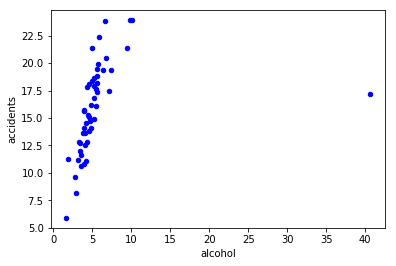

In [10]:
crash.plot.scatter(x= 'alcohol',y= 'accidents' , c= 'blue') # Find Outliers using Scatter Plot X = Alcohol, Y = Accidents

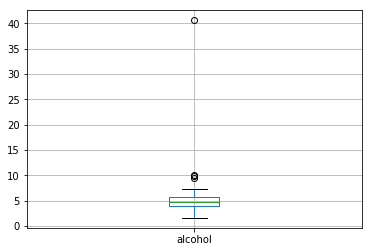

In [11]:
crash.boxplot(column = 'alcohol') # Find Outliers using Boxplot

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

In [12]:
DF_temp = crash.loc[crash['alcohol'] > 15, ['alcohol']] 
# From the Boxplot and Scatter Plot we see values tend to go as high as 12 
# but I'm checking for up to 15 here to find our outlier rows
DF_temp

,alcohol
39,40.642


In [13]:
crash = crash.drop(index = 39)
crash

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,West,Mountain
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Northeast,New England
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,South,South Atlantic
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,South,South Atlantic
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,South,South Atlantic


## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [42]:
query ="""SELECT
            (SELECT AVG(SPEEDING)
                FROM crash
                WHERE REGION = 'Northeast'
            ) AS 'Average Speed In Northeast US',
            
            (SELECT AVG(SPEEDING) 
                FROM crash
            ) AS 'Average Speed In US'
        """
ps.sqldf(query, locals())

,Average Speed In Northeast US,Average Speed In US
0,4.42475,5.01944


## Question 6. Calculate the average alcohol for each region using SQL

In [15]:
# I have provided the SQL for each Region for this question to show the query completely however on the bottom I also
# include a for loop which auto-fills the query as needed. Both ways are equivalent. I will not be writing out the
# SQL queries for the next question as we have too many cases and this becomes tedious labor. This can all be handled very
# well by looping and is actually better in the event we miss out a particular value ourselves.

Northeast_Q ="""
                SELECT AVG(Alcohol) as 'Average Alcohol Level In Northeast US'
                FROM crash
                WHERE REGION = 'Northeast'
             """

South_Q ="""
            SELECT AVG(Alcohol) as 'Average Alcohol Level In South US'
            FROM crash
            WHERE REGION = 'South'
         """

West_Q = """
            SELECT AVG(Alcohol) as 'Average Alcohol Level In West US'
            FROM crash
            WHERE REGION = 'West'
         """

Midwest_Q = """
               SELECT AVG(Alcohol) as 'Average Alcohol Level In Midwest US'
               FROM crash
               WHERE REGION = 'Midwest'
            """
Territory_Q = """
               SELECT AVG(Alcohol) as 'Average Alcohol Level In Territory US'
               FROM crash
               WHERE REGION = 'Territory'
            """ 
# Although This Region (Territory) Is No Longer In The Table, Because It Was Dropped In Question 4, I Am Still Including
# It To Show What The SQL For It Would Look Like.

Region_Array = crash.region.unique() # This would be the elegant simple solution for this Query
for i in Region_Array:
    print(ps.sqldf("SELECT AVG(Alcohol) as  'Average Alcohol Level In " + i +  " US' FROM crash WHERE REGION = '" +i+"'", locals()))

   Average Alcohol Level In South US
0                           5.414647
   Average Alcohol Level In West US
0                          4.754077
   Average Alcohol Level In Northeast US
0                                 3.9805
   Average Alcohol Level In Midwest US
0                             4.996917


In [16]:
ps.sqldf(Northeast_Q, locals()) # Average Alcohol Level by Region

,Average Alcohol Level In Northeast US
0,3.9805


In [17]:
ps.sqldf(South_Q, locals()) # Average Alcohol Level by Region

,Average Alcohol Level In South US
0,5.414647


In [18]:
ps.sqldf(West_Q, locals()) # Average Alcohol Level by Region

,Average Alcohol Level In West US
0,4.754077


In [19]:
ps.sqldf(Midwest_Q, locals()) # Average Alcohol Level by Region

,Average Alcohol Level In Midwest US
0,4.996917


In [20]:
ps.sqldf(Territory_Q, locals()) 
# This Region Was Removed In Question 4.
# It contained an outlier value too extreme to make any sense.

,Average Alcohol Level In Territory US
0,None


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [21]:
# Get All Unique Values For Division
Division_Array = crash.division.unique() 
for i in Division_Array:
    print("Table for " + i + " Division:")
    display(ps.sqldf("SELECT COUNT(speeding), AVG(speeding), MIN(speeding), MAX(speeding)\
                     FROM crash WHERE division = '" + i +"'" , locals()))

Table for East South Central Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,4,4.53325,2.64,7.332


Table for Pacific Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,5,5.9494,4.2,9.45


Table for Mountain Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,8,5.81225,3.496,8.346


Table for West South Central Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,4,6.33375,4.032,7.76


Table for New England Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,6,4.084333,1.886,5.738


Table for South Atlantic Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,9,5.030444,2.006,9.082


Table for East North Central Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,5,4.1066,3.384,4.968


Table for West North Central Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,7,4.293429,1.937,6.923


Table for Middle Atlantic Division:


,COUNT(speeding),AVG(speeding),MIN(speeding),MAX(speeding)
0,2,5.446,1.792,9.1


## Question 8. Answer Question 7 but use Pandas functions

In [22]:
D1 = crash[['division','speeding']].groupby('division').count().rename(columns={"speeding": "Occurances"})
D2 = crash[['division','speeding']].groupby('division').mean().rename(columns={"speeding": "Average Speed"})
D3 = crash[['division','speeding']].groupby('division').min().rename(columns={"speeding": "Minimum Speed"})
D4 = crash[['division','speeding']].groupby('division').max().rename(columns={"speeding": "Maximum Speed"})

All = pd.concat([D1, D2, D3, D4], axis = 1)

All

,Occurances,Average Speed,Minimum Speed,Maximum Speed
division,,,,
East North Central,5,4.106600,3.384,4.968
East South Central,4,4.533250,2.640,7.332
Middle Atlantic,2,5.446000,1.792,9.100
Mountain,8,5.812250,3.496,8.346
New England,6,4.084333,1.886,5.738
Pacific,5,5.949400,4.200,9.450
South Atlantic,9,5.030444,2.006,9.082
West North Central,7,4.293429,1.937,6.923
West South Central,4,6.333750,4.032,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [23]:
STAND = crash[['region','speeding', 'accidents', 'alcohol']].groupby('region').std()\
        .rename(columns={"speeding": "Standard Deviation of Speed","accidents": "Standard Deviation of Accidents", "alcohol": "Standard Deviation of Alcohol"})
SKEW = crash[['region','speeding', 'accidents', 'alcohol']].groupby('region').skew()\
       .rename(columns={"speeding": "Skew of Speed","accidents": "Skew of Accidents", "alcohol": "Skew of Alcohol"})
KURT = crash[['region','speeding', 'accidents', 'alcohol']].groupby('region').apply(pd.DataFrame.kurt)\
       .rename(columns={"speeding": "Kurtosis of Speed","accidents": "Kurtosis of Accidents", "alcohol": "Kurtosis of Alcohol"})

All = pd.concat([STAND, SKEW, KURT], axis = 1)

All

,Standard Deviation of Speed,Standard Deviation of Accidents,Standard Deviation of Alcohol,Skew of Speed,Skew of Accidents,Skew of Alcohol,Kurtosis of Speed,Kurtosis of Accidents,Kurtosis of Alcohol
region,,,,,,,,,
Midwest,1.537451,3.588988,1.824432,0.121197,0.950845,2.093467,-0.737061,2.067092,5.597372
Northeast,2.327773,3.077453,0.872950,1.051666,0.777587,0.764250,1.763520,0.726713,0.890501
South,2.220711,4.537037,1.773576,0.172035,-1.125839,0.330988,-1.327699,1.860064,2.125568
West,1.803138,3.325118,1.910356,0.697441,0.064819,1.159752,-0.465455,-1.048692,2.219220


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

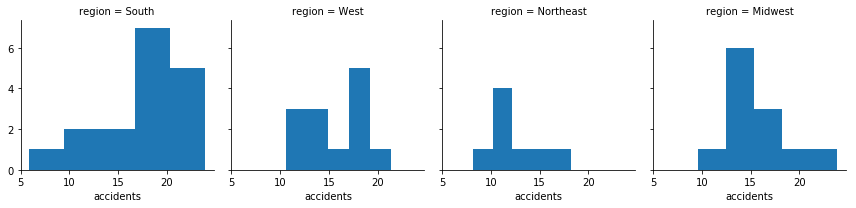

In [24]:
sns.FacetGrid(crash, col = 'region').map(plt.hist, "accidents", bins = 5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurtosis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

Midwest: has a positive Skew with a value of 0.950845, and the Kurtosis is Leptokurtic with a value of 2.067092 <br>
Northeast: has a positive Skew with a value of 0.777587, and the Kurtosis is Leptokurtic with a value of 0.726713 <br>
West: has a positive Skew with a value of 0.064819, and the Kurtosis is Platykurtic with a value of -1.048692 <br>
South: has a negative Skew with a value of -1.125839, and the Kurtosis is Leptokurtic with a value of 1.860064

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [25]:
crash.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


As we can see, among speeding, alcohol, and insurance premiums, alcohol seems to be the highest values to correlate to accidents. The positive correlation between the two is: ~0.851

### Now Load a different dataset (MPG dataset number 3)

In [26]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [27]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [28]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())

#### Rerunning Question 13 should produce all False after running the code above.